<a href="https://colab.research.google.com/github/DevJaepaL/OpenCV/blob/main/Prewitt_Edge(%ED%94%84%EB%A5%B4%EC%9C%97_%EC%97%A3%EC%A7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sobel Edge와 거의 비슷한 결과를 내며 , 소벨 커널과 가운데 계수값만 다른 커널을 사용

Sobel 보다 더 낮은 계수값을 사용하기 때문에 Sobel 보다 Edge가 덜 강조 된다.

응답시간이 Sobel 보다는 다소 빠름, 대각선보다는 수직, 수평 Edge에 더 민감하다.

In [12]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/Lena-Gaussian-noise1.jpg')

# color영상을 gray영상으로 만들기
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


프르윗 필터(커널)  생성

In [13]:
# 프르윗 필터
gx = np.array([[-1,0,1], [-1,0,1], [-1,0,1]], dtype=int)
gy = np.array([[1,1,1], [0,0,0], [-1,-1,-1]], dtype=int)

# 프르윗 필터 컨벌루션
x = cv2.filter2D(gray_img, -1, gx)
y = cv2.filter2D(gray_img, -1, gy)
noise_x = cv2.filter2D(gray_img2, -1, gx)
noise_y = cv2.filter2D(gray_img2, -1, gy)

# uint8 타입(0~255)로 변경하고 영상 합하기
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
output_img = cv2.addWeighted(absX,0.5, absY,0.5, 0)

noise_absX = cv2.convertScaleAbs(noise_x)
noise_absY = cv2.convertScaleAbs(noise_y)
noise_img = cv2.addWeighted(noise_absX,0.5, noise_absY,0.5, 0)

비교를 위해, 소벨 필터 생성

In [14]:
sobelX = cv2.Sobel(gray_img, -1,1,0)
sobelY = cv2.Sobel(gray_img, -1,0,1)
sobel_absX = cv2.convertScaleAbs(sobelX)
sobel_absY = cv2.convertScaleAbs(sobelY)
output_img2 = cv2.addWeighted(sobel_absX,0.5, sobel_absY,0.5, 0)

noise_sobelX = cv2.Sobel(gray_img2, -1,1,0)
noise_sobelY = cv2.Sobel(gray_img2, -1,0,1)
noise_sobel_absX = cv2.convertScaleAbs(noise_sobelX)
noise_sobel_absY = cv2.convertScaleAbs(noise_sobelY)
noise_img2 = cv2.addWeighted(noise_sobel_absX,0.5, noise_sobel_absY,0.5, 0)

화면 출력

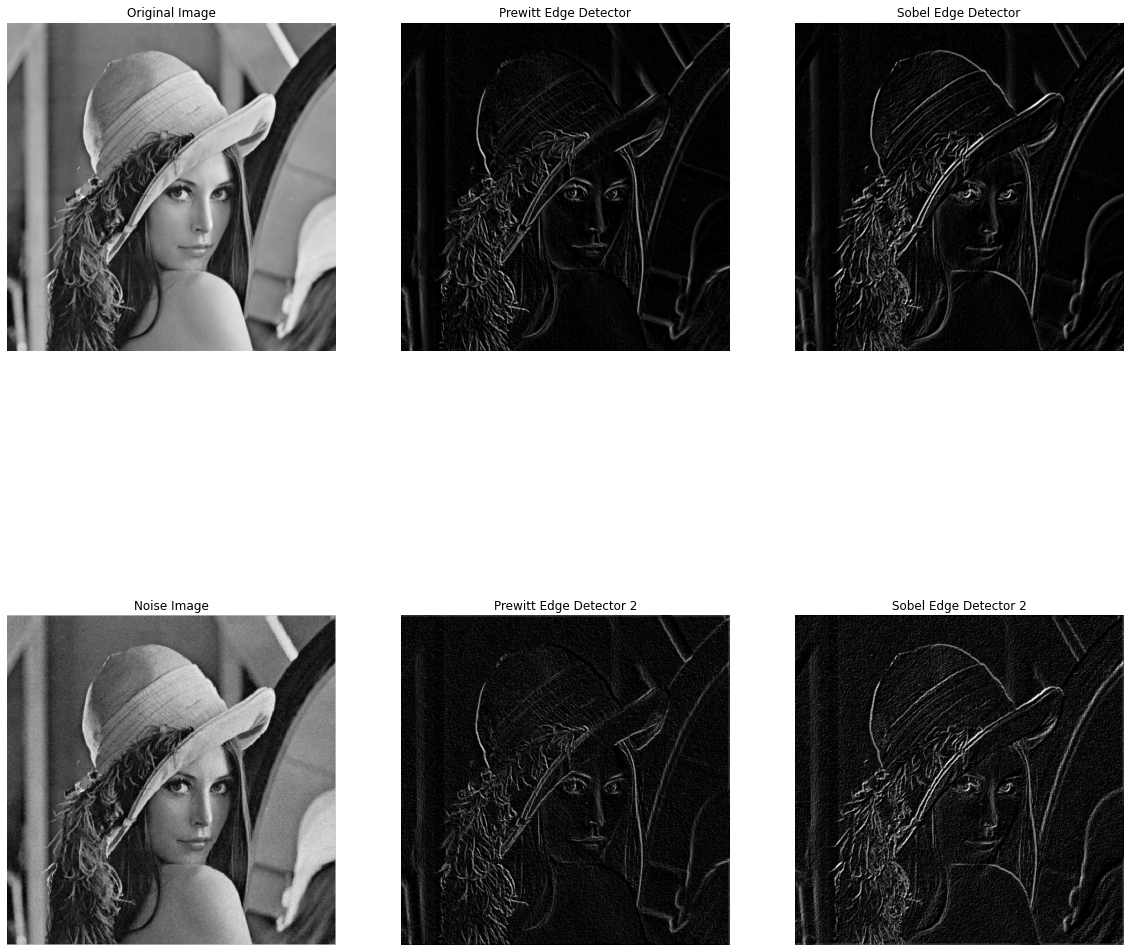

In [15]:
#그림을 화면에 출력
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.title("Original Image")
plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.subplot(2,3,2)
plt.title("Prewitt Edge Detector")
plt.imshow(output_img, cmap='gray')
plt.axis("off")
plt.subplot(2,3,3)
plt.title("Sobel Edge Detector")
plt.imshow(output_img2, cmap='gray')
plt.axis("off")
plt.subplot(2,3,4)
plt.title("Noise Image")
plt.imshow(gray_img2, cmap='gray')
plt.axis("off")
plt.subplot(2,3,5)
plt.title("Prewitt Edge Detector 2")
plt.imshow(noise_img, cmap='gray')
plt.axis("off")
plt.subplot(2,3,6)
plt.title("Sobel Edge Detector 2")
plt.imshow(noise_img2, cmap='gray')
plt.axis("off")
plt.show()